In [132]:
### Importing the required packages and libraries
# we will need numpy and pandas later
import numpy as np
import pandas as pd


from sklearn.linear_model import LinearRegression
#import DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Randomly splitting the original dataset into training set and testing set
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
def mergeData(df):
    features =pd.read_csv('features.csv')
    storesdata =pd.read_csv('stores.csv')
    df = pd.merge(df, features, on=['Store','Date','IsHoliday'],how='inner')
    df = pd.merge(df, storesdata, on=['Store'], how='inner')
    return df

In [134]:
merged_df = mergeData(pd.read_csv('train.csv'))

In [70]:
#merged_df.fillna(value=0, inplace=True)
#merged_df.dropna(inplace=True)

In [135]:
merged_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [136]:
%matplotlib inline

In [137]:
def scatterplots(dataset,label):
    plt.figure()
    y = df['Weekly_Sales']
    plt.scatter(dataset[label],y)
    plt.ylabel('Weekly_Sales')
    plt.xlabel(label)
    

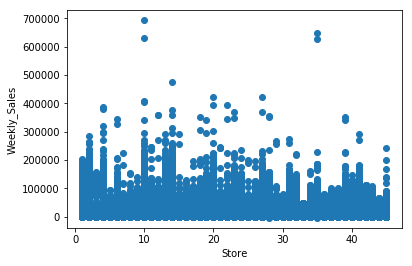

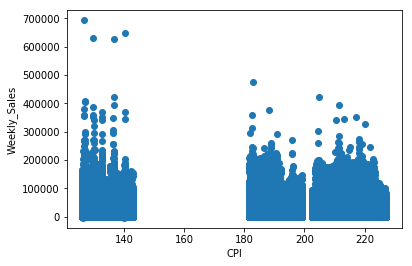

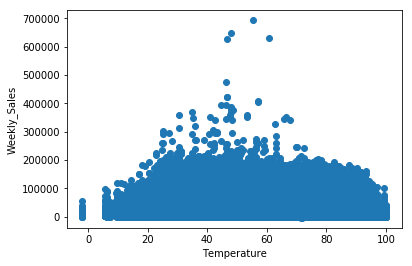

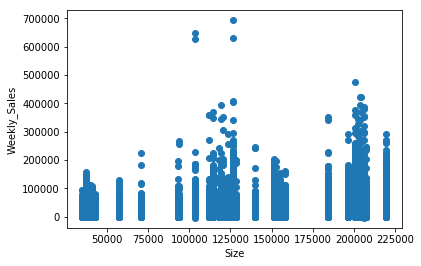

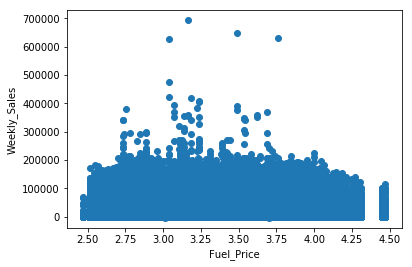

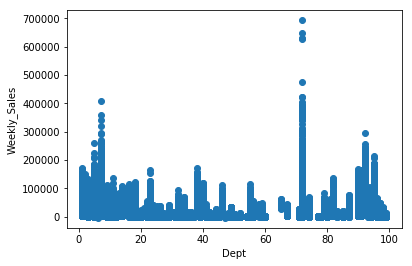

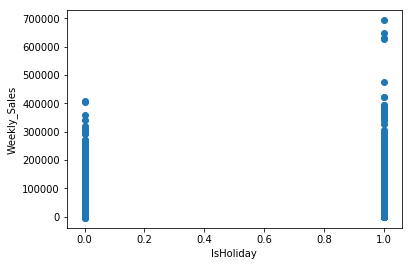

In [138]:
scatterplots(merged_df, 'Store')
scatterplots(merged_df, 'CPI')
scatterplots(merged_df, 'Temperature')
scatterplots(merged_df, 'Size')
scatterplots(merged_df, 'Fuel_Price')
scatterplots(merged_df, 'Dept')
scatterplots(merged_df, 'IsHoliday')

In [139]:
#See what our data actually looks like with the describe function. 
merged_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [147]:
merged_df.loc[merged_df['Weekly_Sales'] >350000,"Date"].value_counts()

2010-11-26    11
2011-11-25     9
2010-12-24     3
Name: Date, dtype: int64

In [148]:
merged_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [149]:
#merged_df.fillna(value=0, inplace=True)
merged_df.dropna(inplace=True)

In [150]:
merged_df['Markdowns'] = merged_df['MarkDown1'] + merged_df['MarkDown2'] + merged_df['MarkDown3'] + merged_df['MarkDown4'] + merged_df['MarkDown5'] 
labelsToDrop = ['MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4','MarkDown5']
merged_df.drop(labels=labelsToDrop,axis=1, inplace=True)

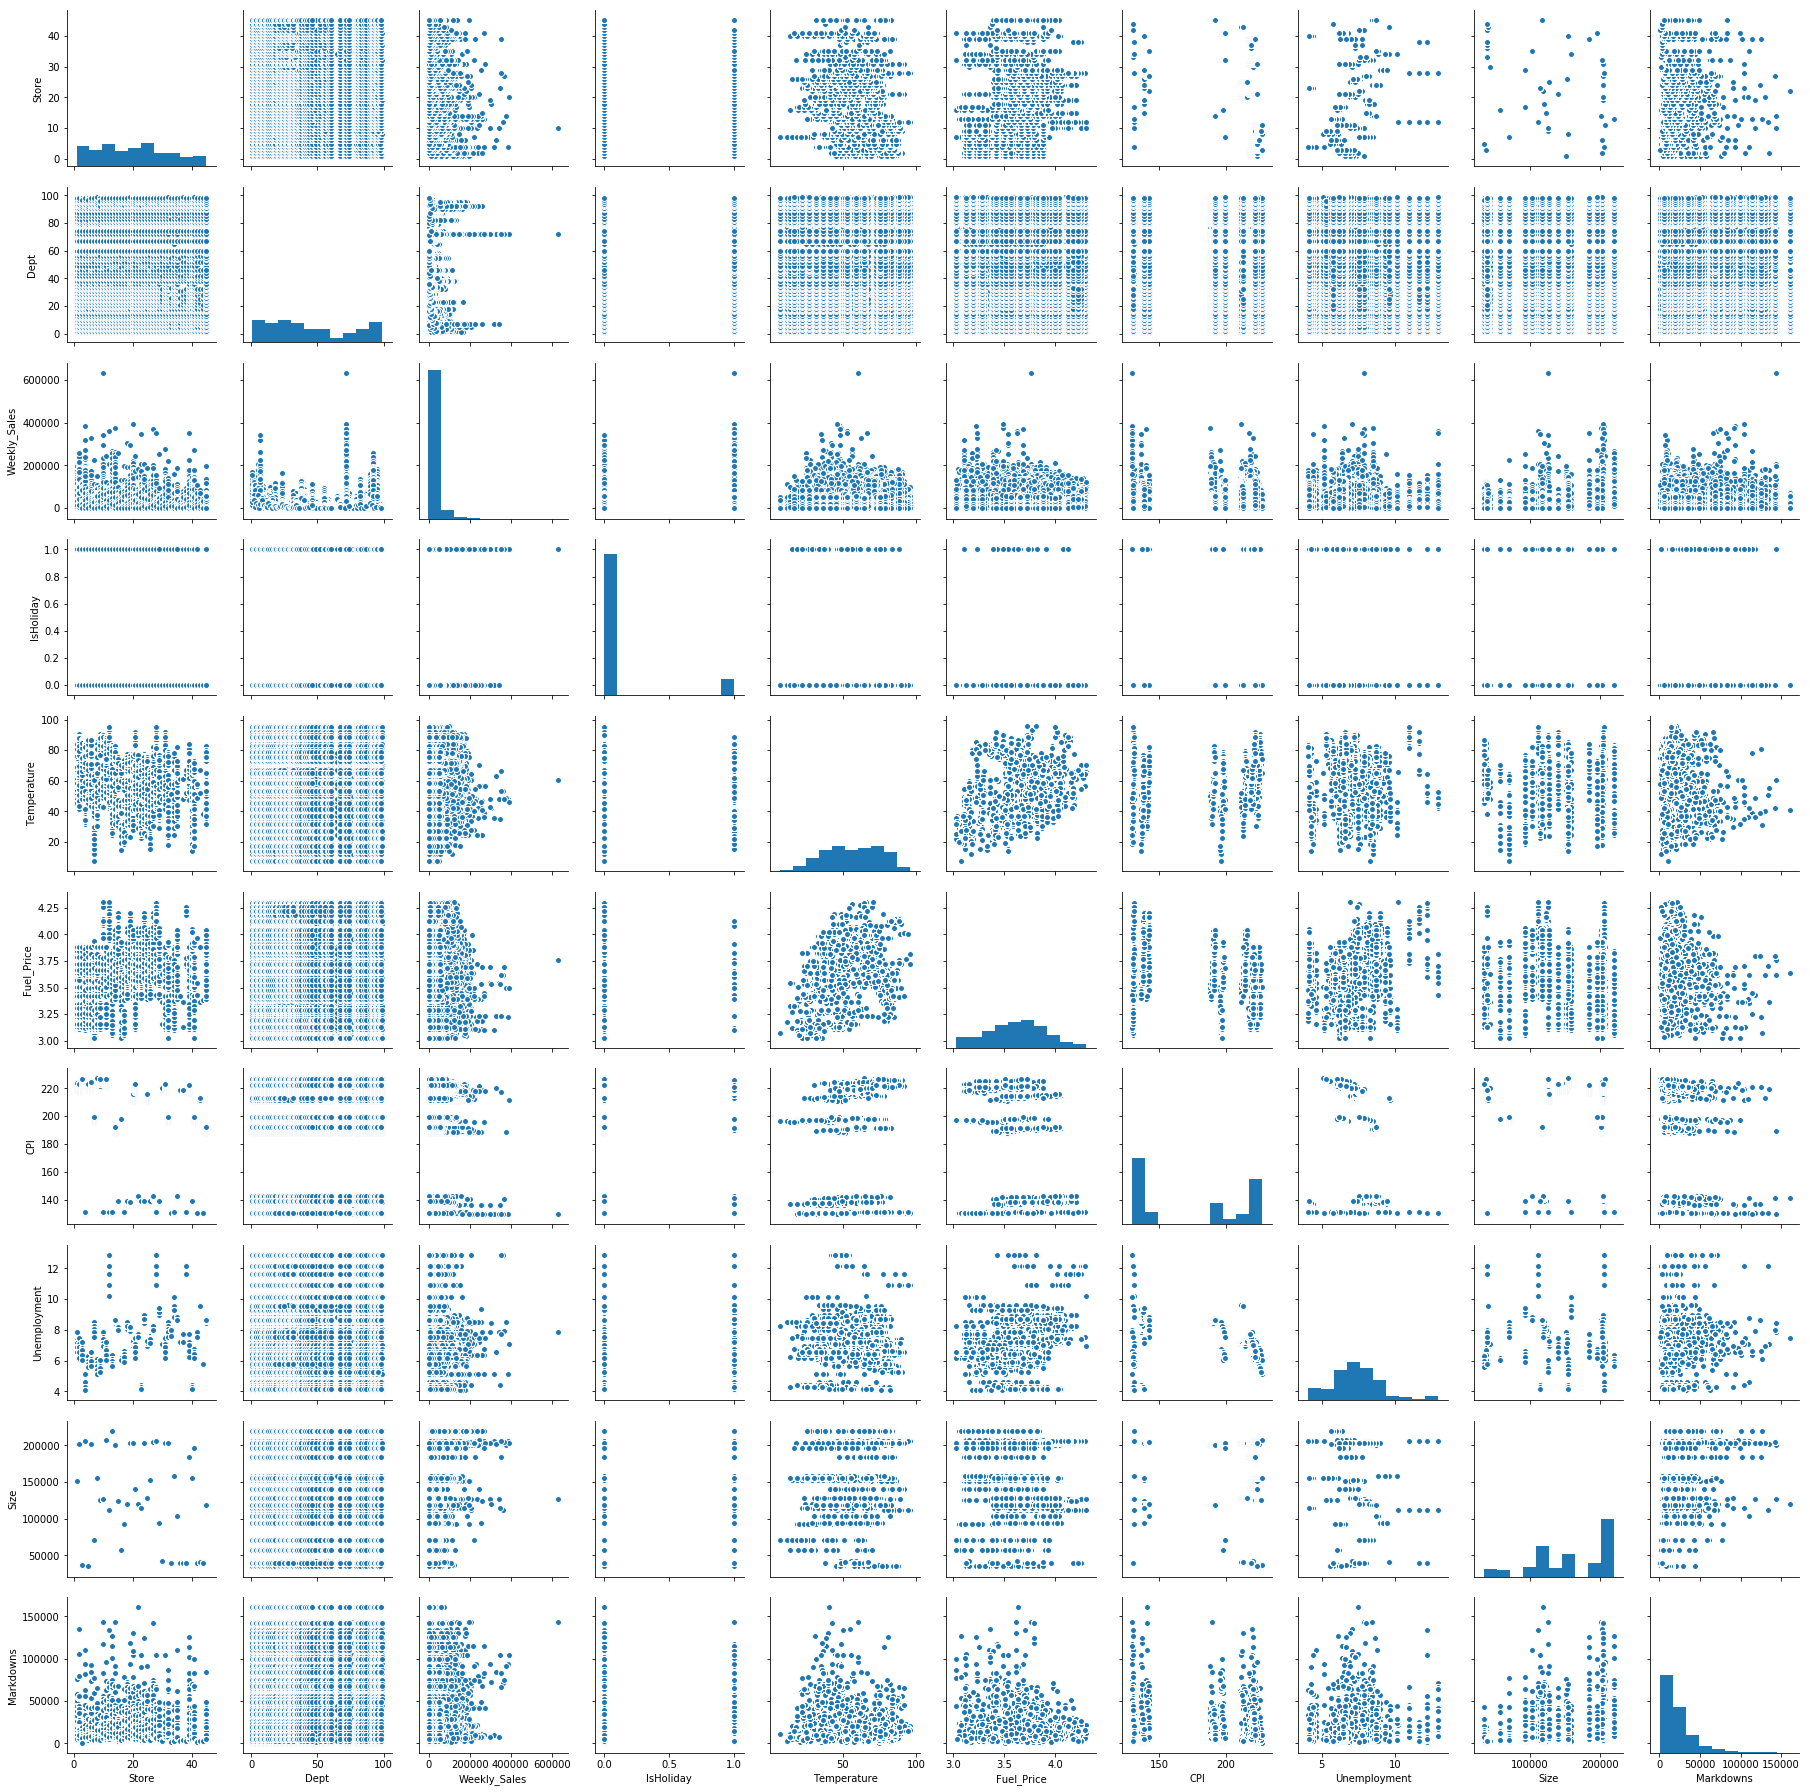

In [151]:
sns.pairplot(merged_df)

In [152]:
print(merged_df.head())

      Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
6587      1     1  2011-11-11      18689.54      False        59.11   
6588      1     2  2011-11-11      44936.47      False        59.11   
6589      1     3  2011-11-11       9959.64      False        59.11   
6590      1     4  2011-11-11      36826.52      False        59.11   
6591      1     5  2011-11-11      31002.65      False        59.11   

      Fuel_Price         CPI  Unemployment Type    Size  Markdowns  
6587       3.297  217.998085         7.866    A  151315   25671.68  
6588       3.297  217.998085         7.866    A  151315   25671.68  
6589       3.297  217.998085         7.866    A  151315   25671.68  
6590       3.297  217.998085         7.866    A  151315   25671.68  
6591       3.297  217.998085         7.866    A  151315   25671.68  


In [153]:
from pandas import DatetimeIndex
df = merged_df
df.Date = pd.to_datetime(df.Date)
print(df.head())

      Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
6587      1     1 2011-11-11      18689.54      False        59.11   
6588      1     2 2011-11-11      44936.47      False        59.11   
6589      1     3 2011-11-11       9959.64      False        59.11   
6590      1     4 2011-11-11      36826.52      False        59.11   
6591      1     5 2011-11-11      31002.65      False        59.11   

      Fuel_Price         CPI  Unemployment Type    Size  Markdowns  
6587       3.297  217.998085         7.866    A  151315   25671.68  
6588       3.297  217.998085         7.866    A  151315   25671.68  
6589       3.297  217.998085         7.866    A  151315   25671.68  
6590       3.297  217.998085         7.866    A  151315   25671.68  
6591       3.297  217.998085         7.866    A  151315   25671.68  


In [154]:
df['Year'] = DatetimeIndex(df['Date']).year
df['Month']= DatetimeIndex(df['Date']).month
df['Day'] = DatetimeIndex(df['Date']).day
df = df.drop(columns=['Date'])
df[0::1000]

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Markdowns,Year,Month,Day
6587,1,1,18689.54,False,59.11,3.297,217.998085,7.866,A,151315,25671.68,2011,11,11
7587,1,83,5715.09,True,48.02,3.409,220.265178,7.348,A,151315,36311.85,2012,2,10
9082,1,83,7042.10,False,81.57,3.227,221.883779,6.908,A,151315,22721.04,2012,7,6
16873,2,72,85773.69,False,59.33,3.297,217.645539,7.441,A,202307,41227.19,2011,11,11
17873,2,42,9134.42,False,43.82,3.510,220.065199,7.057,A,202307,39808.76,2012,2,17
19299,2,42,9593.58,False,84.20,3.227,221.521506,6.565,A,202307,24977.63,2012,7,6
26378,3,46,6577.81,False,63.91,3.308,221.643285,7.197,B,37392,5217.89,2011,11,18
28206,3,10,14905.51,False,81.65,3.452,225.252146,6.664,B,37392,8206.44,2012,6,8
36307,4,58,4370.00,True,47.96,3.225,129.836400,5.143,A,205863,93322.93,2011,11,25
37307,4,38,85754.80,False,50.38,3.619,130.645793,4.607,A,205863,34300.09,2012,3,2


# Testing and Training Data

In [155]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size', 'Markdowns',
       'Year', 'Month', 'Day'],
      dtype='object')

In [156]:
y = df['Weekly_Sales']

In [157]:
X = df[['Store', 'Dept','IsHoliday', 'Temperature','Fuel_Price', 'CPI', 'Unemployment', 'Size', 'Markdowns']]

In [35]:
#here we need this library to scale X
#from sklearn import preprocessing

#normalizing feature comlumns 
#X = preprocessing.scale(X)

In [158]:
#Randomly Splitting the original dataset into training set and testing set. 30% of data samples for testing, and rest 70% for training.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [159]:
lr = LinearRegression()

In [160]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Print out Coefficients of the model

In [161]:
lr.coef_

array([-1.50690825e+02,  1.09894611e+02,  4.21903825e+02,  8.93527455e+00,
       -1.56639884e+03, -3.29979901e+01, -4.78313416e+02,  1.00380466e-01,
        3.11132093e-02])

In [162]:
predictions = lr.predict(X_test)

Text(0,0.5,'Predicted Values')

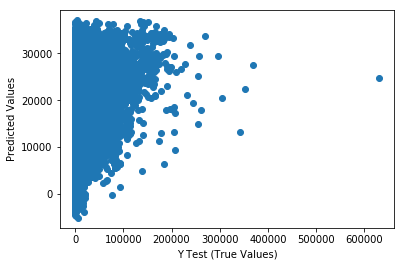

In [163]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

# Evaulating the Model 

Calculating Mean Absolute Error, Mean Sqaure Error, And Root Mean Sqaure Error.

In [164]:
from sklearn import metrics

In [165]:
print('MAE ', metrics.mean_absolute_error(y_test,predictions))
print('MSE ', metrics.mean_squared_error(y_test,predictions))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))


MAE  16180.91780103272
MSE  584716080.8086878
RMSE  24180.90322565904


# RECREATE THE DATAFRAME 

In [90]:
cdf = pd.DataFrame(lr.coef_, columns=['Coeff'])

In [91]:
cdf

,Coeff
0,-150.690825
1,109.894611
2,421.903825
3,8.935275
4,-1566.398844
5,-32.997990
6,-478.313416
7,0.100380
8,0.031113
